# **🍷 Wine Quality Regression Project**  
## 수업 과제를 이용하여 분석 확장을 통한 와인 품질 예측 연습

---

이 보고서는 와인 품질 데이터를 활용한 **수업 과제 분석을 바탕으로 작성했다**.  
기존 과제에서는 탐색적 데이터 분석(EDA)과 레드와인과 화이트와인 간 품질 차이에 대한 통계적 차이 검증(t-검정)을 했었다.

이 보고서에서는 과제를 개인적으로 확장해서, 훈련/검증/테스트 데이터 분할과 파이프라인 기반 전처리를 적용한 **회귀 모델링 및 성능 평가를 연습했다**.


# **✨ 프로젝트의 전체 과정 살펴보기**

## 🟡 1. 데이터 불러오기
- 레드와인, 화이트와인 데이터 CSV 파일 로드
- 와인 유형을 구분하기 위한 `type` 변수 생성
- 두 데이터셋 병합

## 🟡 2. X, Y 분리하기
- 종속변수(y): quality (와인 품질 점수)
- 독립변수(X): 화학적 특성 변수들

## 🟡 3. 수치형 EDA (관찰만)
- 품질(quality) 분포 확인
- 수치형 변수들의 분포 및 기초 통계 확인
- 독립변수와 품질 간 관계 탐색
- 레드와인과 화이트와인의 품질 분포 비교

## 🟡 4. 범주형 EDA (관찰만)
- 와인 유형(type)에 따른 품질 분포 비교  
※ 본 데이터셋은 대부분 수치형 변수로 구성되어 있어,  
범주형 변수에 대한 분석은 제한적으로 수행함.

## 🟡 5. 훈련 / 검증 / 테스트 데이터 분할하기
- Train / Validation / Test 데이터 분리
- 데이터 누수를 방지하기 위해 분할 후 전처리 수행

## 🟡 6. 훈련 데이터 전처리 (Train 기준)
- 결측치 처리
- 이상치 처리
- 범주형 변수 인코딩
- StandardScaler를 활용한 수치형 변수 스케일링 
- 수치형 변수 간 다중공선성 여부 확인

## 🟡 7. 검증 데이터 전처리 (Train 기준 적용)
- 훈련 데이터에서 학습된 전처리 기준을 검증 데이터에 동일하게 적용

## 🟡 8. 검증 모델 선택하기
- Linear Regression, Ridge, Lasso 모델 학습
- Validation 데이터 기준으로 성능 비교 (R², RMSE)
- 최적의 회귀 모델 선택

## 🟡 9. 잔차 분석
- 예측값과 실제값의 차이 분석
- 잔차 분포 시각화를 통해 선형성 및 등분산성 확인

## 🟡 10. 테스트 데이터 전처리 (Train 기준) 및 예측 결과 생성
- 선택된 최종 모델을 사용하여 테스트 데이터 예측
- 테스트 데이터 기준 최종 성능 평가


---
---

# **📊1단계 : 데이터 불러오기**

#### 🟢 1) csv파일을 데이터프레임으로 불러오기

In [243]:
## pandas and numpy 라이브러리 불러오기
import pandas as pd 
import numpy as np

## csv 파일을 DataFrame으로 불러오기
red_df = pd.read_csv('winequality-red.csv')
white_df = pd.read_csv('winequality-white.csv')    

display(red_df)
display(white_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### 🟢 2) 레드 와인과 화이트 와인 파일 합치기

- 레드 와인에 type열 추가하기

In [244]:
red_df.insert(0, column = 'type', value = 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [245]:
red_df.shape

(1599, 13)

- 화이트 와인에도 type 열 추가하기

In [246]:
white_df.insert(0, column = 'type', value = 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [247]:
white_df.shape

(4898, 13)

#### 🟢 3) red_df와 white_df 를 병합한 후 구조 확인하기

In [248]:
wine_df = pd.concat([red_df, white_df], ignore_index = True)
wine_df.shape

(6497, 13)

In [249]:
wine_df.to_csv('winequality-both.csv', index=False)

In [250]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


---
---

# **📌2단계 : X, Y 분리** (종속변수, 독립변수 분리)

#### 🟢 1) 데이터에서 X, y 및 변수 타입 분리

- 타겟 변수 `Quality`를 기준으로 입력 변수 `X`와 타깃 `y`를 분리한다.


In [251]:
## 입력 변수와 타겟 변수 분리

target = 'quality'         
X = wine_df.drop(columns=[target])   ### 타겟을 제외한 나머지 컬럼을 입력 변수 X로 사용
y = wine_df[target]                  ### 타겟 변수만 y로 분리

print(X.columns) 
print(y)              

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64


#### 변수 中 문자형변수가 있는지 확인하기

In [252]:
import pandas as pd

# X는 이미 로드된 DataFrame
cat_cols = X.select_dtypes(include=["object", "category"])
cat_count = cat_cols.shape[1]        # 개수
print(cat_count)
print(cat_cols.dtypes)               # 어떤 컬럼이 범주형인지 확인


1
type    object
dtype: object


- 문자형 변수가 있는지 확인 1개 존재 `"type"` 

- 종속 변수 X 에서 숫자형 변수를 num_cols에 저장 이전 단계에서 문자형 변수를 cat_cols에 저장해놨음 



In [253]:
num_cols = X.drop(columns=cat_cols.columns.tolist())  ### 범주형 변수를 X에서 제거
display(num_cols.info())
check_cat = num_cols.select_dtypes(include=["object", "category"])
print(check_cat.shape[1])  ### 범주형 변수가 제거되었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


None

0


---
---

# **🔨3단계 : 수치형 EDA**(관찰만)

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


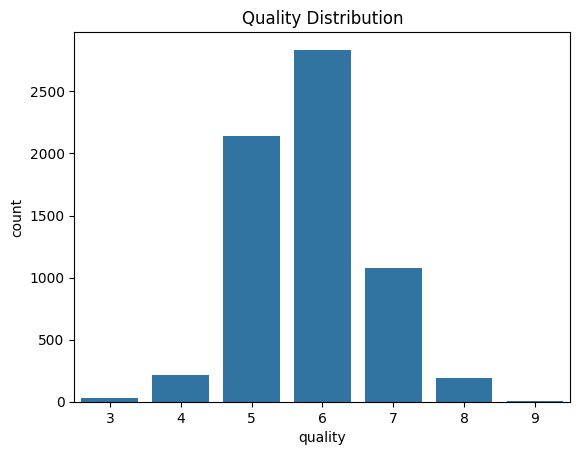

In [254]:
## quality 변수의 분포 확인

display(y)
y.info()

sns.countplot(data=wine_df, x="quality")
plt.title("Quality Distribution")
plt.show()


### 🟢 EDA를 위한 데이터 분할

수치형·범주형 변수의 분포를 관찰하기 위해,  
전처리 이전 상태의 입력 변수 `X`와 타rpt 변수 `y`를 기준으로  
훈련 데이터와 검증 데이터, 테스트 데이터를 분할했다.

이 분할은 전처리 기준을 학습하기 위한 목적이 아닌,  
EDA 단계에서의 분포 확인을 위한 용도로만 사용되며,  
이후 전처리 및 모델 학습 단계에서는 별도로 정의된 분할을 사용한다.


In [255]:
from sklearn.model_selection import train_test_split

# 1) Train : Temp = 6 : 4 (최종적으로 6:2:2 만들기)
X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 2) Temp를 Valid : Test = 1 : 1 로 나누기 (2 : 2)
X_valid_raw, X_test_raw, y_valid_raw, y_test_raw = train_test_split(
    X_temp_raw, y_temp_raw, test_size=0.5, random_state=42
)

print(len(X_train_raw), len(X_valid_raw), len(X_test_raw))


3898 1299 1300


#### 🟢 1) 변수 분포 시각화 (히스토그램)

- 변수 목록에 대해 각 변수별 히스토그램을 시각화
- 각 변수의 분포(대칭 여부, 꼬리 길이, 이상치 가능성)를 비교하여 전처리 방향을 결정하기 위한 관찰 목적으로 사용

- 데이터 누수 가능성을 더 줄이기 위해, 분포 관찰은 훈련 데이터(X_train) 기준으로만 확인

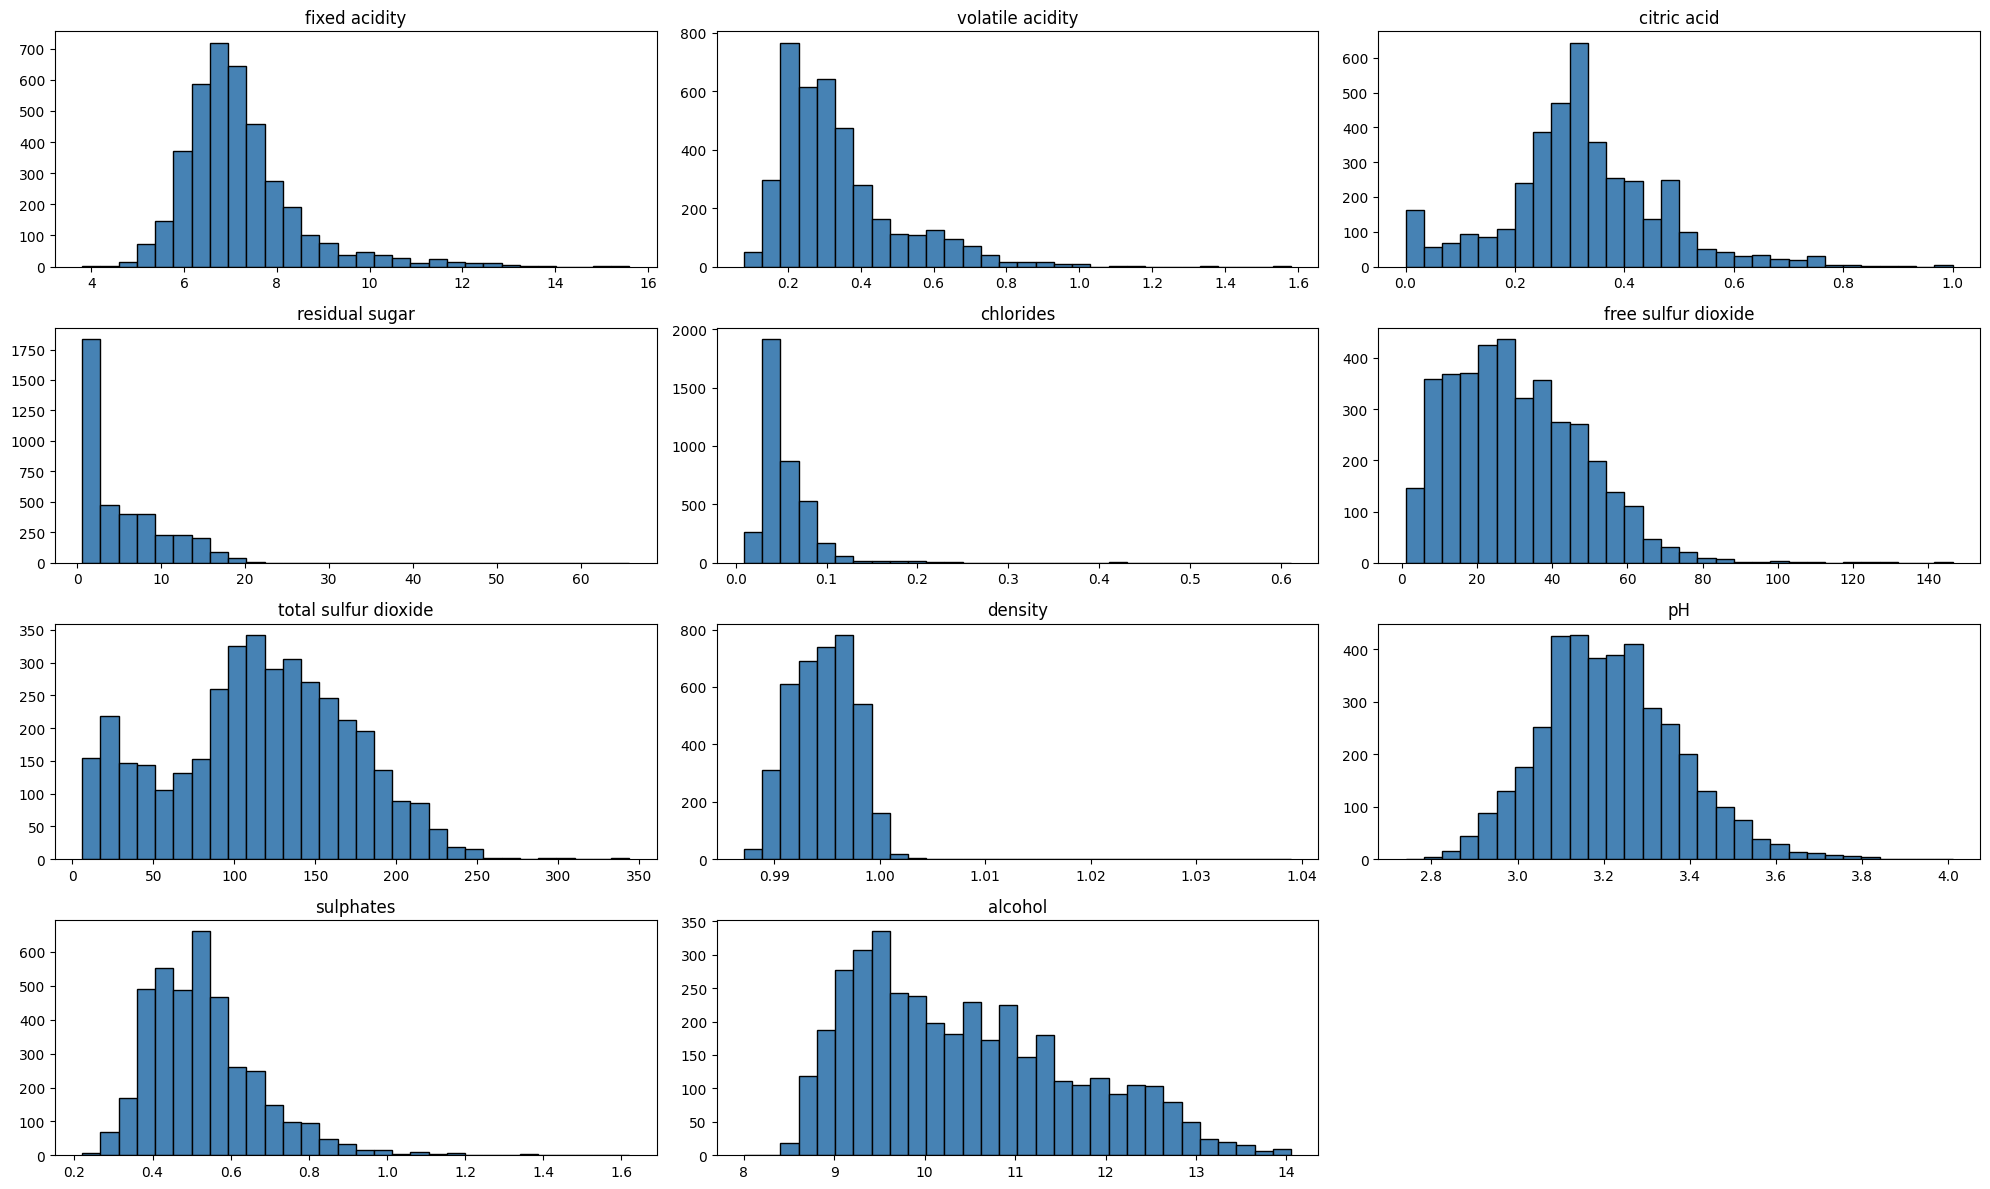

In [256]:
import matplotlib.pyplot as plt

num_cols_list = num_cols.columns.tolist() ## 입력 변수 이름 리스츠를 num_cols_list에 저장

rows = 4  ## 행
cols = 3  ## 열

plt.figure(figsize=(20, 12))  ## 전체 Figure크기 설정(가로 20, 세로 12)

for i, col in enumerate(num_cols_list):   ## num_cols_list의 각 변수(col)에 대해 인덱스(i)와 함께 반복
    plt.subplot(rows, cols, i + 1)
    plt.hist(X_train_raw[col], bins=30, color='steelblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()  ## 출력

#### 🟢 2) 변수와 타겟(quality) 간 상관분석

- 어떤 변수들이 와인품질(`quality`)과 강한 양(+)의 상관 또는 음(−)의 상관을 가지는지 한눈에 파악해서 이상치를 처리할 변수를 선택하는데 사용


In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

## 타겟변수(quality)를 포함해서 상관분석할 수치형 변수 리스트 만들기
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
num_for_corr = num_cols + ['quality']   ### 수치형 변수 리스트 + 타겟

## quality를 포함한 상관계수 행렬 계산
corr_matrix = wine_df[num_for_corr].corr()  ### 상관계수 행렬

## quality와의 상관계수만 뽑아서, 내림차순 정렬
corr_with_target = corr_matrix['quality'].sort_values(ascending=False)
print("📌 quality와의 상관계수 (내림차순):\n")
print(corr_with_target)


📌 quality와의 상관계수 (내림차순):

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


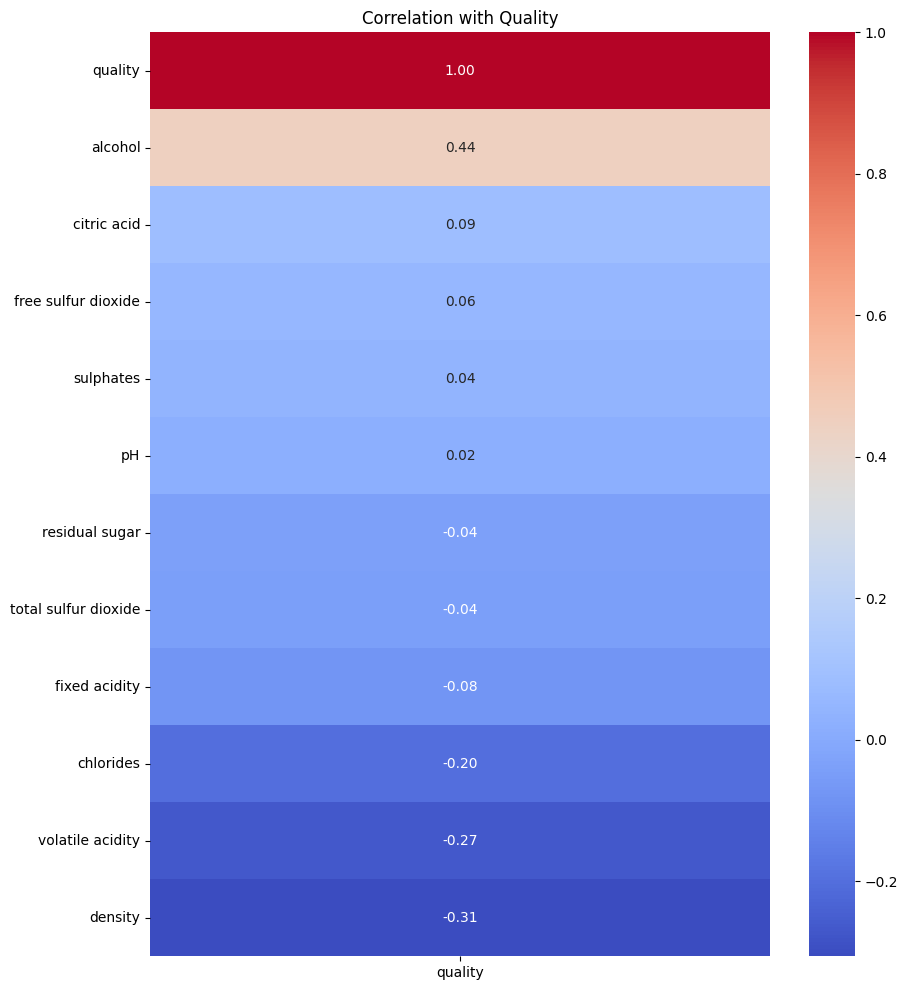

In [258]:
plt.figure(figsize=(10, 12)) 
sns.heatmap(corr_matrix[['quality']].sort_values(by='quality', ascending=False), ### 내림차순 정렬
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Quality')
plt.show()


#### 🟢 3) 레드와인과 화이트와인의 품질 분포 비교

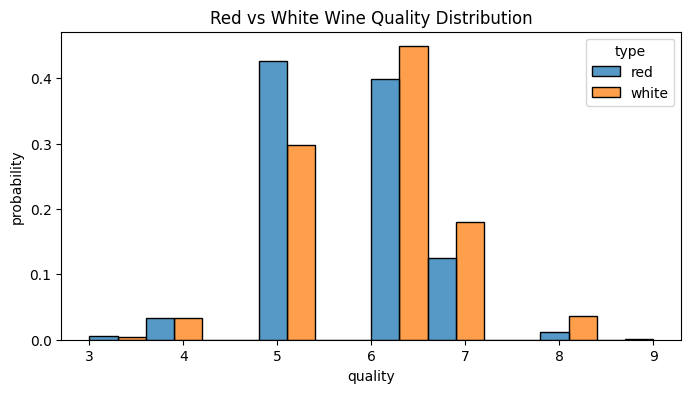

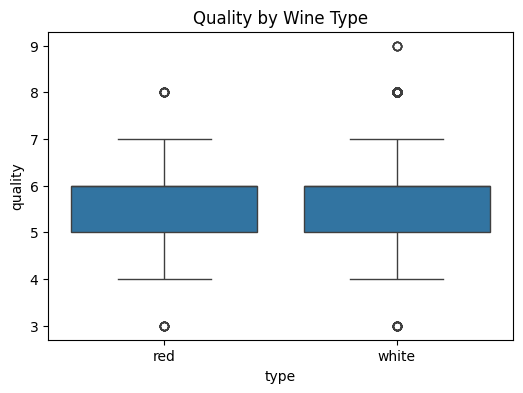

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(data=wine_df, x="quality", hue="type",
             bins=10, stat="probability", common_norm=False, multiple="dodge") ### probability : 확률밀도, multiple="dodge" : 막대 분리
plt.title("Red vs White Wine Quality Distribution")
plt.xlabel("quality")
plt.ylabel("probability")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=wine_df, x="type", y="quality")
plt.title("Quality by Wine Type")
plt.show()


### 💡 이상치 처리 기준 설정 및 대상 변수 선정

분석에서는 와인 품질 예측을 위해 사용되는 수치형 변수들의 분포와  
타겟 변수인 `quality`와의 상관관계를 종합적으로 고려해서 
이상치 제거 여부를 변수별로 신중하게 판단했다.

와인 품질 데이터는 화학적 실험을 통해 측정된 값들로 구성되어 있고,  
값의 분포가 한쪽으로 치우쳐 있거나 극단값을 포함하더라도  
반드시 오류를 의미하지는 않는다.  
따라서 모든 변수에 일괄적으로 이상치 제거를 적용하기보다는,  
**변수의 의미·분포 형태·품질과의 관계**를 기준으로 판단했다.

---

#### 📌 이상치 제거를 적용하지 않은 변수 (제거 X)

##### 1) 품질과의 상관관계가 높은 핵심 변수  
(`alcohol`, `density`, `volatile acidity`)

- 상관분석 결과,  
  `alcohol`은 품질과 **양의 상관관계(≈ 0.44)**를,  
  `density`와 `volatile acidity`는 **음의 상관관계**를 비교적 뚜렷하게 보였다.
- 이 변수의 극단값은 실제 와인 특성을 반영한 값일 가능성이 높고, 제거할 경우 품질 예측에 중요한 정보가 손실될 수 있다고 판단했다.
- 따라서 위변수들에 대해서는 이상치 제거를 적용하지 않았다.

---

##### 2) 화학적 농도 및 제조 특성 변수  
(`residual sugar`, `free sulfur dioxide`, `total sulfur dioxide`, `pH`, `citric acid`)

- 이 변수들은 와인의 제조 방식과 스타일에 따라  
  자연스럽게 넓은 분포와 비대칭 분포를 보이는 특성이 있다.
- 히스토그램 확인한 결과, 일부 극단값이 존재하지만  
  이 극단값들은  특정 와인 스타일을 반영한 정상적인 값일 가능성이 높다고 판단했다.
- 이러한 값들을 이상치로 제거할 경우, 데이터의 다양성과 실제 와인 특성이 훼손될 수 있다.

따라서 위 변수들에 대해서도 이상치 제거를 적용하지 않았다.

---

#### 📌 이상치 제거를 적용한 변수 (제거 O)

##### 1) `chlorides` 염화물

- `chlorides`는 품질과 **상대적으로 뚜렷한 음의 상관관계(≈ -0.20)**를 보였으며,  
  분포 확인 결과 일부 관측치에서 극단적으로 큰 값이 존재했다.
- 염화물 수치가 과도하게 높은 경우 와인의 품질을 크게 저하시킬 가능성이 있으며,  
  이러한 값은 일반적인 와인 범위를 벗어난 경우로 판단했다.
- 따라서 회귀 모델 학습 시 특정 관측치가 계수 추정에 과도한 영향을 주는 것을 방지하기 위해  
  `chlorides` 변수에 대해 **IQR 기준 이상치 제거를 적용했다**.

---

##### 2) `sulphates` 황산염

- `sulphates`는 품질과의 상관관계가 상대적으로 낮고(≈ 0.04),  
  히스토그램 상 일부 극단값이 존재했다.
- 해당 변수는 일정 범위를 초과할 경우 쓴맛을 유발할 수 있어,  
  극단값이 품질 예측에 노이즈로 작용할 가능성이 있다고 판단했다.
- 이에 따라 `sulphates` 변수 역시 **IQR 기준 이상치 제거 대상**으로 선정헸다.

---

#### ✅ 최종 이상치 제거 적용 변수

- `chlorides`
- `sulphates`

위 변수들은  
- 분포 상 극단값이 존재하며  
- 품질 예측에 과도한 영향을 미칠 가능성이 있다고 판단된 변수들이다.

따라서 이후 전처리 단계에서는  
**위 두 변수에 한해서만 IQR 기준을 적용하여 이상치를 제거**했다.


---
---

 # **🔨4단계 : 범주형 EDA**(관찰만)

In [260]:
display(cat_cols)

,type
0,red
1,red
2,red
3,red
4,red
...,...
6492,white
6493,white
6494,white
6495,white


**범주형 변수는 `와인의 타입 (type)` = 레드 와인 인지, 화이트 와인인지 구분을 하는 변수이기때문에 따로 이상치 처리를 할 필요가 없다.** 

---
---

# **⚙️ 5단계 : 훈련/검증 데이터 분할** (Train 60% / Valid 20% / Test 20%)

In [261]:
##  처음 train 을 가지고 올떄 temp(valid + test)이용해서 나누기 / train 60%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

## temp를 valid와 test로 50:50 나누기 / valid 20%, test 20%
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


print("훈련용 X_train shape:", X_train.shape)
print("훈련용 y_train shape:", y_train.shape) 
print("검증용 X_valid shape:", X_valid.shape)
print("검증용 y_valid shape:", y_valid.shape)
print("테스트 X_test shape:", X_test.shape)
print("테스트 y_test shape:", y_test.shape)


훈련용 X_train shape: (3898, 12)
훈련용 y_train shape: (3898,)
검증용 X_valid shape: (1299, 12)
검증용 y_valid shape: (1299,)
테스트 X_test shape: (1300, 12)
테스트 y_test shape: (1300,)


---
---

# **🪄 6단계 : 훈련 데이터 전처리**

1. 결측치 처리
2. 이상치 처리
3. 원핫인코딩
4. 수치형 변수 + 원-핫 인코딩된 범주형 변수 결합 (스케일링 전)
5. StandardScaler를 활용한 수치형 변수 스케일링
6. 수치형 변수 간 다중공선성 여부 확인

---

#### **❶  결측치 처리**

🟢 1) 결측치 개수 확인하기

In [262]:
X_train.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

- 결측치 개수 확인 결과 : 결측치가 없다는 것을 알게 되었다
--> 결측치를 따로 처리 할 필요가 없다

---

#### **❷ 이상치 처리**

🟢 1) 수치형 이상치 처리
- 앞 3단계 수치형 EDA과정에서 수치형 변수들의 분포와 타겟(quality)과의 상관관계 파악및 변수들 각각의 특징을 이용하여 이상치를 처리할 변수와 하지 않을 변수를 선정했다

- 이상치 제거 할 변수 : chlorides(염화물), sulphates(황산염)

In [263]:
import numpy as np

## 이상치 제거 대상 변수
outlier_cols = ['chlorides', 'sulphates']

## 원본 보존하기 위해 복사본 생성
X_train_clean = X_train.copy()
y_train_clean = y_train.copy()

## 변수별 제거 개수 기록
removed_counts = {}
bounds = {}

for col in outlier_cols:
    Q1 = X_train_clean[col].quantile(0.15)
    Q3 = X_train_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    bounds[col] = (lower, upper)

    ## 이상치 범위 (IQR) 벗어난 행의 인덱스 추출
    idx_outliers = X_train_clean[(X_train_clean[col] < lower) | (X_train_clean[col] > upper)].index

    removed_counts[col] = len(idx_outliers)

    ## X, y 동시 제거
    X_train_clean = X_train_clean.drop(index=idx_outliers)
    y_train_clean = y_train_clean.drop(index=idx_outliers)

    print(f"{col}: 제거된 이상치 개수 = {len(idx_outliers)}")

print("\n✅ 이상치 제거 후 Train shape:", X_train_clean.shape, y_train_clean.shape)


chlorides: 제거된 이상치 개수 = 143
sulphates: 제거된 이상치 개수 = 62

✅ 이상치 제거 후 Train shape: (3693, 12) (3693,)


#### 🟢 2) 이상치 제거 전·후 분포 비교 (히스토그램)

이상치 제거 대상 변수(`outlier_cols`)에 대해,  
제거 전(`X_train`)과 제거 후(`X_train_clean`)의 분포를 비교했다.

- 동일 변수에 대해 두 분포를 겹쳐서 시각화하여  
  IQR 기반 이상치 제거가 분포의 꼬리 및 전체 형태에 미치는 영향을 확인했다.
- 본 시각화는 **훈련 데이터 기준**으로 수행헸다.


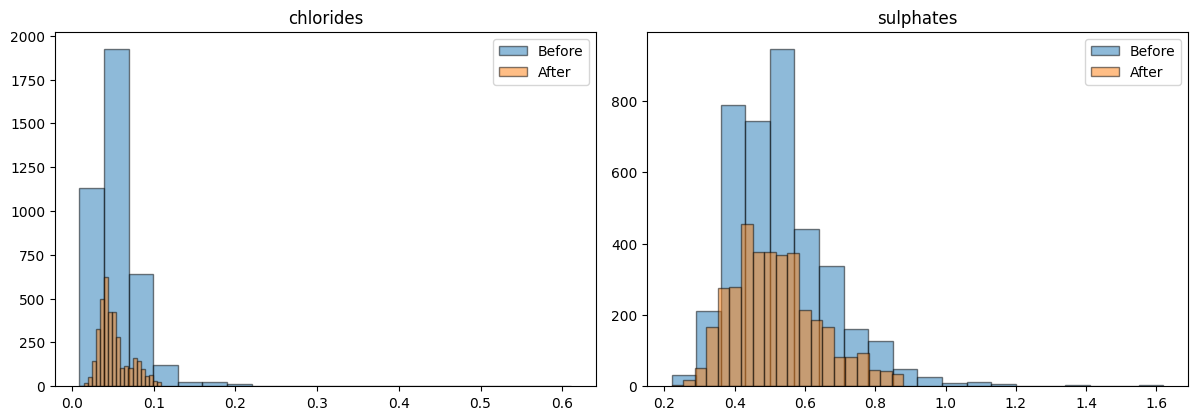

In [264]:
import matplotlib.pyplot as plt

rows, cols = 2, 3
plt.figure(figsize=(18, 8))

for i, col in enumerate(outlier_cols):
    plt.subplot(rows, cols, i + 1)

    plt.hist(X_train[col], bins=20, alpha=0.5, label='Before', edgecolor='black')
    plt.hist(X_train_clean[col], bins=20, alpha=0.5, label='After', edgecolor='black')

    plt.title(col)
    plt.legend()
    plt.tight_layout()

plt.show()


#### 🟢 3) 전처리 후 최종 훈련 데이터 개수 정리

- 이상치 제거 전 훈련 데이터 행 개수: `len(X_train)`
- 이상치 제거 후 훈련 데이터 행 개수: `len(X_train_clean)`
- 제거된 행 개수: `len(X_train) - len(X_train_clean)`

In [265]:
print(f"이상치 제거 전 Train 행 개수: {len(X_train)}")
print(f"이상치 제거 후 Train 행 개수: {len(X_train_clean)}")
print(f"제거된 Train 행 개수: {len(X_train) - len(X_train_clean)}")

print("\n변수별 제거 개수 요약:", removed_counts)


이상치 제거 전 Train 행 개수: 3898
이상치 제거 후 Train 행 개수: 3693
제거된 Train 행 개수: 205

변수별 제거 개수 요약: {'chlorides': 143, 'sulphates': 62}


---

### **❸ 원핫인코딩**

범주형 변수 (type 와인의 종류)는 모델이 바로 학습할 수 있는 형태가 아니므로, 훈련을 위해 범주형을 0/1 더미 변수로 변환하는 과정이 필요하다.

`OneHotEncoder`를 사용하여 범주형 변수를 원-핫 인코딩했다.

- 인코더는 **훈련 데이터(`X_train_rare`)의 범주형 변수에만 fit**하여 카테고리(더미 컬럼 생성 규칙)를 학습한다.
- `handle_unknown='ignore'` 옵션을 사용하여  
  검증/테스트 데이터에 훈련에서 보지 못한 카테고리가 등장하더라도 오류 없이 처리되도록 했다.


In [266]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = X_train_clean.select_dtypes(include=['object', 'category']).columns.tolist()

## 1) 원핫 인코더 설정
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') ### drop='first' : 기준 카테고리 제거

## 2) Train 범주형: fit + transform
X_train_cat_encoded = ohe.fit_transform(X_train_clean[cat_cols])

## 3) 원핫인코딩된 컬럼 이름 생성
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

## 4) DataFrame 변환 (index 유지 중요!)
X_train_cat_df = pd.DataFrame(
    X_train_cat_encoded,
    columns=ohe_feature_names,
    index=X_train_clean.index
)

print("X_train_cat_df shape:", X_train_cat_df.shape)

X_train_cat_df shape: (3693, 1)


범주형 변수 `type`은 원핫 인코딩을 통해 숫자형으로 만들었다.  
이때 범주가 두 개인 변수(red/white)의 경우,  
모든 범주를 더미 변수로 생성하면 완전 다중공선성이 발생할 수 있기 떄문에
`drop='first'` 옵션을 사용하여 기준 범주 하나를 제거했다.


In [267]:
X_train_cat_df.head()

,type_white
5546,1.0
3106,1.0
3096,1.0
3018,1.0
3951,1.0


인코딩 결과 생성된 `type_white` 값이 1인 경우 화이트 와인을,  
0인 경우 레드 와인을 의미한다.

---


### **❹ 수치형 변수 + 원-핫 인코딩된 범주형 변수 결합 (스케일링 전)**

In [268]:
## 수치형 컬럼 (train_clean 기준)
num_vars_train = X_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train_num = X_train_clean[num_vars_train].copy()

## 결합
X_train_before_scaling = pd.concat([X_train_num, X_train_cat_df], axis=1)

print(X_train_before_scaling.shape)


(3693, 12)


---

### **❺ StandardScaler를 활용한 수치형 변수 스케일링**

1) StandardScaler를 활용하여 수치형 변수에 대해서만 스케일링을 한다

In [269]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

## 수치형 컬럼만(더미 제외)
num_cols = X_train_num.columns.tolist()

X_train_scaled = X_train_before_scaling.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train_before_scaling[num_cols])

print(X_train_scaled.shape)


(3693, 12)


스케일링 전/후 평균과 표준편차 비교

In [270]:
import pandas as pd
from IPython.display import display  ### 표 형태 출력하기 위해서

## 스케일링 전 mean, std (Train 수치형)
before_mean = X_train_num.mean()
before_std  = X_train_num.std()

## 스케일링 "후" 수치형만 따로 추출 (더미(type_white) 제외)
X_train_scaled_num = X_train_scaled[X_train_num.columns]

after_mean = X_train_scaled_num.mean()
after_std  = X_train_scaled_num.std()

## 비교표 생성
compare_df = pd.DataFrame({
    '스케일링전 평균': before_mean,
    '스케일링전 표준편차': before_std,
    '스케일링후 평균': after_mean,
    '스케일링후 표준편차': after_std
}).round(4)

display(compare_df)


,스케일링전 평균,스케일링전 표준편차,스케일링후 평균,스케일링후 표준편차
fixed acidity,7.1494,1.2319,0.0,1.0001
volatile acidity,0.3295,0.1565,0.0,1.0001
citric acid,0.3161,0.1394,0.0,1.0001
residual sugar,5.5862,4.8454,-0.0,1.0001
chlorides,0.0506,0.0185,-0.0,1.0001
free sulfur dioxide,30.8775,17.2371,0.0,1.0001
total sulfur dioxide,117.7566,55.2605,0.0,1.0001
density,0.9946,0.0030,-0.0,1.0001
pH,3.2178,0.1599,0.0,1.0001
sulphates,0.5167,0.1228,0.0,1.0001


위의 표를 통해 평균을0, 표준편차를 1로 만들었음을 확인했다

---

### **❻ 수치형 변수 간 다중공선성 여부 확인**

#### - **`다중공선성`**

다중공선성은 여러 변수가 **서로 비슷한 정보를 반복해서 담고 있을 때** 발생하는 문제로,  
주로 **연속적인 값인 수치형 변수들 사이에서** 나타난다.  

다중공선성이 강할 경우, 회귀 모델은 각 변수의 개별적인 영향을 명확하게 구분하기 어려워지며,  
그 결과 회귀 계수의 해석력이 떨어질 수 있다.  
이를 사전에 확인하고 필요에 따라 **다중공선성이 높은 변수 중 일부를 제거하기 위해**  **VIF**를 활용하여 다중공선성을 점검했다.



- **다중공선성을 수치형 변수 간에만 확인한 이유는**  
  연속적인 값인 수치형 변수와 달리, 범주형 변수는 원-핫 인코딩을 통해  
  **0과 1로 표현된 더미 변수**로 변환된다.  
  또한 본 분석에서는 `drop='first'` 옵션을 사용하여 **기준 범주를 제거해서**,  
  더미 변수들 간에 발생할 수 있는 **구조적인 중복 문제를 사전에 방지했다**.

따라서 다중공선성은 **수치형 변수 간에만 확인**하고,  
**원-핫 인코딩된 범주형 변수는 다중공선성 분석 대상에서 제외했다.**


In [271]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ VIF는 "수치형 변수"에 대해서만 계산 (원핫 더미 제외)
# - 아래는 네가 만든 스케일링된 train 수치형 데이터프레임을 그대로 사용
X_vif = X_train_scaled[X_train_num.columns].copy()   # 수치형만 (type_white 제외)

# (선택) 결측치가 있으면 제거/대체 필요
# X_vif = X_vif.dropna()

vif_df = pd.DataFrame({
    "변수": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False).reset_index(drop=True)

display(vif_df)


,변수,VIF
0,density,19.034598
1,residual sugar,8.713409
2,alcohol,4.821921
3,fixed acidity,4.461458
4,total sulfur dioxide,2.888572
5,chlorides,2.842064
6,pH,2.522579
7,free sulfur dioxide,2.121484
8,volatile acidity,1.941542
9,citric acid,1.607947


VIF 분석 결과, `density`와 `residual sugar` 변수에서 비교적 높은 VIF 값이 확인되었다.  
이는 해당 변수들이 다른 화학적 특성 변수들과 **구조적으로 강한 연관성**을 가지기 때문으로,  
와인 제조 과정상 **자연스러운 결과**로 해석할 수 있다. *(도메인 지식 활용)*

특히 `density`는 알코올 함량과 잔당량의 영향을 동시에 받는 변수로,  
여러 독립변수의 **조합으로 설명될 가능성이 높아** VIF 값이 크게 나타난 것으로 판단했다.

본 분석에서는 다중공선성이 높은 변수를 **즉시 제거하지 않고**,  
일반 선형회귀뿐 아니라 **Ridge, Lasso 회귀 모델을 함께 비교**함으로써  
다중공선성에 따른 영향을 **완화하고자 했다**.


---
---

# **🪄 7단계 : 검증 데이터 전처리**

검증 데이터(`X_valid`)는 모델 성능을 공정하게 평가하기 위한 데이터이므로,  
전처리 기준을 **새로 학습(fit)** 하지 않고  
**훈련 데이터에서 학습한 기준을 그대로 적용(transform)** 하는 방식으로 처리했다.

이를 통해:
- 검증 데이터 정보가 전처리 기준에 반영되는 문제를 방지
- 모델 성능 평가의 신뢰성을 확보하고자 했다

### 🔧 검증 데이터 전처리 적용 항목

- 결측치 처리  
  → 결측치가 없음
- 이상치 처리  
  → Train에서 정의한 **이상치 제거 기준(IQR 대상 변수)** 그대로 적용  
- 원-핫 인코딩  
  → Train에서 `fit`된 `OneHotEncoder`로 `transform`만 수행  
- 수치형 변수 스케일링  
  → Train에서 `fit`된 `StandardScaler`로 `transform`만 수행  

> ⚠️ 검증 데이터에서는 어떤 단계에서도 `fit`을 수행하지 않았다.

In [272]:
## 결측치 확인
X_valid.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

검증데이터의 결측치 개수는 0개 이므로 따로 결측치 대체등의 처리가 필요하지 않다.

In [273]:
## 검증데이터의 수치형 이상치 처리 

X_valid_clean = X_valid.copy()
y_valid_clean = y_valid.copy()

for col, (lower, upper) in bounds.items():
    X_valid_clean[col] = X_valid_clean[col].clip(lower, upper)


In [274]:
## 검증데이터의 원핫인코딩 (transform만)

cat_cols = X_train_clean.select_dtypes(include=['object', 'category']).columns.tolist()

X_valid_cat_encoded = ohe.transform(X_valid_clean[cat_cols])   # ⭐ transform만
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

X_valid_cat_df = pd.DataFrame(
    X_valid_cat_encoded,
    columns=ohe_feature_names,
    index=X_valid_clean.index
)


In [275]:
## 검증데이터의 수치형 변수 + 원 핫 인코딩된 범주형 변수 결합(스케일링 전)
## 수치형 컬럼 (train_clean 기준)

num_vars_train = X_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_valid_num = X_valid_clean[num_vars_train].copy()

X_valid_before_scaling = pd.concat([X_valid_num, X_valid_cat_df], axis=1)


In [276]:
## 검증데이터 수치형 변수에 스케일링 (Train에서 fit한 스케일러로 transform만)

X_valid_scaled = X_valid_before_scaling.copy()

X_valid_scaled[num_cols] = scaler.transform(X_valid_before_scaling[num_cols])  # ⭐ transform만


In [ ]:
'''
# ✅ Valid 전처리(이상치/인코딩/스케일링) 완료 여부 최종 점검

# 1) 결측치 확인
print("[NaN check]")
print("Train NaNs:", X_train_scaled.isna().sum().sum())
print("Valid NaNs:", X_valid_scaled.isna().sum().sum())

# 2) 컬럼 구조(개수/이름/순서) 동일 여부
print("\n[Column check]")
print("Train cols:", X_train_scaled.shape[1], "/ Valid cols:", X_valid_scaled.shape[1])
print("Same column set?:", set(X_train_scaled.columns) == set(X_valid_scaled.columns))
print("Same column order?:", list(X_train_scaled.columns) == list(X_valid_scaled.columns))

# 3) 인코딩 컬럼(type) 존재 및 값(0/1) 확인
type_cols = [c for c in X_train_scaled.columns if "type" in c]
print("\n[OHE check]")
print("Type columns:", type_cols)
if len(type_cols) > 0:
    for c in type_cols:
        print(f"{c} unique values (Train):", sorted(X_train_scaled[c].unique())[:10])
        print(f"{c} unique values (Valid):", sorted(X_valid_scaled[c].unique())[:10])

# 4) 스케일링 수치형 통계(Valid도 비슷한 스케일인지 확인: 평균/표준편차)
num_cols = X_train_num.columns.tolist()
valid_num_scaled = X_valid_scaled[num_cols]

print("\n[Scaling check: Valid numeric]")
print("Valid numeric mean (top5):")
print(valid_num_scaled.mean().sort_values().head(5).round(4))
print("Valid numeric std (top5):")
print(valid_num_scaled.std().sort_values().head(5).round(4))

# 5) 인덱스 유일성(merge/concat 오류 방지)
print("\n[Index check]")
print("Train index unique?:", X_train_scaled.index.is_unique)
print("Valid index unique?:", X_valid_scaled.index.is_unique)

print("\n✅ If NaNs are 0 and columns match (set + order), preprocessing is consistent.")
'''

[NaN check]
Train NaNs: 0
Valid NaNs: 0

[Column check]
Train cols: 12 / Valid cols: 12
Same column set?: True
Same column order?: True

[OHE check]
Type columns: ['type_white']
type_white unique values (Train): [np.float64(0.0), np.float64(1.0)]
type_white unique values (Valid): [np.float64(0.0), np.float64(1.0)]

[Scaling check: Valid numeric]
Valid numeric mean (top5):
total sulfur dioxide   -0.0440
free sulfur dioxide    -0.0368
residual sugar         -0.0362
alcohol                 0.0067
citric acid             0.0131
dtype: float64
Valid numeric std (top5):
residual sugar         0.9739
density                0.9762
alcohol                0.9971
pH                     1.0045
free sulfur dioxide    1.0055
dtype: float64

[Index check]
Train index unique?: True
Valid index unique?: True

✅ If NaNs are 0 and columns match (set + order), preprocessing is consistent.


---
---

# **🤖 8단계 : 검증모델 선택하기(4가지 회귀모델 비교)**

In [288]:
## 검증 모델 선택하기

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_clean)
    y_valid_pred = model.predict(X_valid_scaled)

    r2 = r2_score(y_valid_clean, y_valid_pred)
    rmse = np.sqrt(mean_squared_error(y_valid_clean, y_valid_pred))

    results.append({"Model": name, "R2 (Valid)": r2, "RMSE (Valid)": rmse})

results_df = pd.DataFrame(results).sort_values("RMSE (Valid)")
results_df


,Model,R2 (Valid),RMSE (Valid)
0,LinearRegression,0.286697,0.720771
1,Ridge,0.286688,0.720775
3,ElasticNet,0.284849,0.721704
2,Lasso,0.283920,0.722172


Validation 성능 비교 결과, Linear Regression이 가장 좋은 성능을 보였으나  
Ridge 모델과의 차이는 매우 미미하여 R²와 RMSE 기준에서 두 모델은 거의 동일한 성능을 보였다.

와인 데이터는 `density`, `residual sugar`와 같이 다중공선성이 높은 변수를 포함하고 있기 때문에,  
계수의 안정성을 확보할 수 있는 Ridge 회귀 모델을 최종 모델로 선택하였다.  
릿지를 선택하여 예측 성능을 유지하면서도 다중공선성으로 인한 영향을 완화하고자 한다.

### **✅ 릿지 모델 사용!**

---
---

# **📈 9단계 : 잔차분석**

In [290]:
## 최종 모델 선택 (Ridge) + 잔차 분석

from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

best_ridge = Ridge(alpha=1.0)
best_ridge.fit(X_train_scaled, y_train_clean)

y_valid_pred = best_ridge.predict(X_valid_scaled)

residuals = y_valid_clean - y_valid_pred

res_df = pd.DataFrame({
    "y_true": y_valid_clean,
    "y_pred": y_valid_pred,
    "residual": residuals
})

res_df.head()


,y_true,y_pred,residual
1451,7,6.060604,0.939396
3773,7,5.592191,1.407809
4957,6,6.458351,-0.458351
1437,5,5.318648,-0.318648
2988,6,5.732675,0.267325


In [291]:
## 잔차 통계량 확인

print("잔차 평균:", res_df['residual'].mean())
print("잔차 표준편차:", res_df['residual'].std())
print(res_df['residual'].describe())


잔차 평균: 0.028269938305028372
잔차 표준편차: 0.7204979458052277
count    1299.000000
mean        0.028270
std         0.720498
min        -3.599603
25%        -0.413516
50%         0.026450
75%         0.504850
max         2.386294
Name: residual, dtype: float64


- **잔차의 평균**은 약 0.028로 0에 매우 가까워,
모델이 전반적으로 과대 또는 과소 예측에 치우치지 않은
편향 없는 예측을 수행하고 있음을 확인할 수 있다.

- **잔차의 표준편차**는 약 0.72로 나타났으며,
이는 검증 데이터 기준 RMSE와 거의 동일한 수준으로,
모델의 예측 오차 규모가 안정적으로 유지되고 있음을 의미한다.

- **잔차의 중앙값**은 약 0.026으로 평균과 유사한 값을 보여,
잔차 분포가 한쪽으로 크게 치우치지 않았음을 확인했다.

- **잔차의 최소값과 최대값**은 각각 약 -3.60, 2.39로 일부 극단적인 오차가 존재하지만,
전체 1,299개 관측치 중 일부에 해당하며,
대부분의 잔차는 사분위 범위 기준 약 -0.41 ~ 0.50 내에 분포하였다.


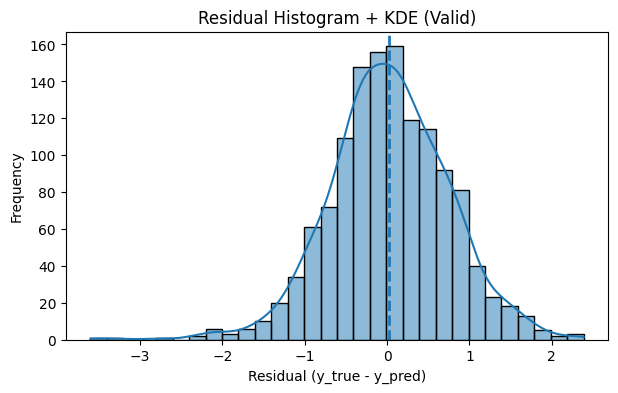

In [295]:
## 📊 잔차 히스토그램 + KDE 곡선


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

# 히스토그램 (빈도)
sns.histplot(res_df["residual"], bins=30, kde=True, stat="count", edgecolor="black")

# 평균선
plt.axvline(res_df["residual"].mean(), linestyle="--", linewidth=2)

plt.title("Residual Histogram + KDE (Valid)")
plt.xlabel("Residual (y_true - y_pred)")
plt.ylabel("Frequency")
plt.show()

### 📊 잔차 히스토그램 해석

잔차 히스토그램과 KDE 곡선을 확인한 결과,  
잔차 분포는 **0을 중심으로 좌우가 비교적 대칭적인 종 모양**을 띄고 있다.

- 잔차 평균이 0에 매우 가까워,  
  모델이 특정 방향으로 과대 또는 과소 예측하는 **편향은 크지 않다**.
- 대부분의 잔차가 0 주변에 밀집되어 있으며,  
  극단적인 오차는 일부 관측치에서만 제한적으로 나타난다.
- KDE 곡선 역시 정규분포에 가까운 형태를 보여,  
  **잔차의 정규성 가정이 전반적으로 잘 만족되고 있다**고 판단했다.

회귀 모델은 검증 데이터 기준에서 **안정적인 예측 오차 분포**를 갖는 것으로 해석할 수 있다.


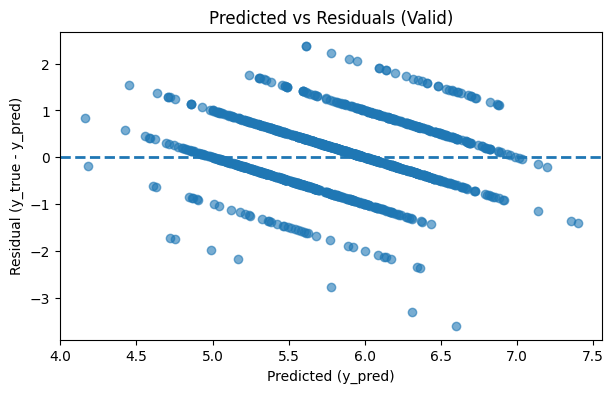

In [ ]:
## 📈 예측값 vs 잔차 산점도

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.scatter(res_df["y_pred"], res_df["residual"], alpha=0.6)
plt.axhline(0, linestyle="--", linewidth=2)
plt.title("Predicted vs Residuals (Valid)")
plt.xlabel("Predicted (y_pred)")
plt.ylabel("Residual (y_true - y_pred)")
plt.show()

### 📈 예측값 vs 잔차 산점도 해석

예측값(y_pred)과 잔차(residual)의 산점도를 확인한 결과,  
잔차가 **0을 중심으로 비교적 고르게 분포**하고 있으며  
예측값의 크기에 따라 잔차의 분산이 급격히 증가하거나 감소하는 패턴은 뚜렷하게 나타나지 않았다.

- 예측값 전반에 걸쳐 잔차가 무작위적으로 분포하여  
  **선형성 가정이 크게 위반되지는 않는 것으로 판단했다.**
- 잔차의 분산 또한 예측값 구간별로 크게 달라지지 않아  
  **등분산성 가정 역시 전반적으로 만족**한다고 해석할 수 있다.
- 일부 관측치에서 상대적으로 큰 잔차가 존재하지만,  
  이는 특정 품질 점수(이산값 구조)에 따른 자연스러운 현상으로 판단했다.

회귀 모델은 검증 데이터 기준에서 **선형성 및 등분산성 가정을 합리적으로 만족**하는 것으로 판단했다.


<Figure size 600x600 with 0 Axes>

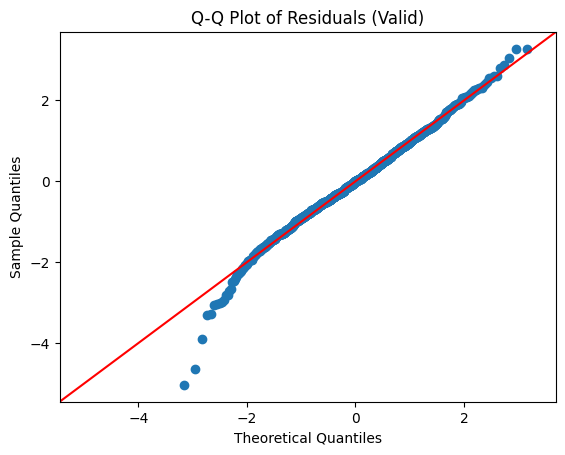

In [ ]:
## 📐 Q-Q plot

import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(6, 6))
sm.qqplot(res_df["residual"], line="45", fit=True)
plt.title("Q-Q Plot of Residuals (Valid)")
plt.show()

### 📐 Q-Q Plot 해석 (잔차의 정규성)

Q-Q plot을 통해 검증 데이터의 잔차 분포를 확인한 결과,  
대부분의 점들이 기준 직선(이론적 정규분포)과 **잘 일치**하는 모습을 보였다.

- 중앙부 구간에서는 점들이 직선에 밀접하게 위치하여  
  **잔차가 정규분포를 비교적 잘 따르고 있음**을 확인할 수 있었다.
- 다만, 양쪽 꼬리 부분에서는 일부 점들이 직선에서 벗어나며  
  **극단값(outlier)에 따른 약한 왜도**가 존재함을 확인했다.
- 이는 품질 점수가 이산값(정수) 구조를 가지는 와인 데이터의 특성상  
  자연스럽게 발생할 수 있는 현상으로 판단했다.

종합적으로, 잔차는 완전한 정규분포는 아니지만  
회귀 계수 해석과 통계적 추론에 **큰 문제가 없을 정도로 정규성 가정을 충분히 만족**한다고 판단했다.


### 🧾 잔차 종합 분석 (Residual Analysis Summary)

검증 데이터(valid set)를 기준으로 잔차의 분포와 패턴을 종합적으로 분석한 결과

---

#### 1️⃣ 잔차의 중심 및 편향 여부

- 잔차 평균은 **0에 매우 가까운 값(≈ 0.03)** 으로 나타났다.
- 이는 모델이 전반적으로 **과대·과소 예측 없이 균형 잡힌 예측**을 수행하고 있음을 의미한다.
- 특정 방향으로 치우친 체계적인 편향은 관찰되지 않았다.

---

#### 2️⃣ 잔차의 분산 및 오차 규모

- 잔차의 표준편차는 **약 0.72**로,  
  앞서 계산한 RMSE 값과 유사한 수준을 보였다.
- 이는 모델의 예측 오차가 **일관된 규모로 유지되고 있으며**,  
  성능 지표와 잔차 분석 결과가 서로 정합적임을 의미한다.

---

#### 3️⃣ 잔차 히스토그램 분석

- 잔차 분포는 **0을 중심으로 한 종 형태**를 보였다.
- KDE 곡선 또한 대칭적인 형태를 나타내어,  
  잔차가 특정 방향으로 쏠리지 않았음을 확인했다.
- 이를 통해 잔차의 **정규성 가정이 전반적으로 만족**된다고 판단했다.

---

#### 4️⃣ 예측값 vs 잔차 산점도 분석

- 예측값 전반에 걸쳐 잔차가 **0을 기준으로 무작위적으로 분포**하였다.
- 특정 구간에서 잔차가 체계적으로 커지거나 작아지는 패턴은 관찰되지 않았다.
- 이는 **선형성** 과 **등분산성** 가 대체로 만족됨을 시사한다.
- 예측값이 정수 단위(품질 점수)로 제한되어 있어 대각선 형태의 띠 구조가 나타났으나,
  이는 타겟 변수의 이산적 특성에 따른 자연스러운 현상으로 해석했다.

---

#### 5️⃣ Q-Q Plot을 통한 정규성 검토

- Q-Q plot에서 대부분의 점들이 기준 직선에 근접하게 위치했다.
- 중앙 구간에서는 정규분포 가정을 잘 만족했으며,
  일부 꼬리 영역에서만 경미한 이탈이 관찰되었다.
- 이는 극단적인 품질 점수 관측치에 따른 영향으로,
  회귀 분석의 해석에 큰 문제를 줄 수준은 아니라고 판단했다.

---

### ✅ 종합 결론

잔차 분석 결과,

- **편향 없음 (잔차 평균 ≈ 0)**
- **선형성 만족**
- **등분산성 대체로 만족**
- **잔차 정규성 가정 충분히 만족**

이라는 결론을 도출할 수 있었다.

따라서 최종 선택한 **Ridge 회귀 모델**은  
검증 데이터 기준에서 안정적이고 신뢰할 수 있는 예측 성능을 보이며,  
본 프로젝트의 목적에 적합한 회귀 모델이라고 판단했다.


---
---

# **🍀 10단계 : 테스트 데이터 전처리(Train 기준) 및 예측 결과 생성**

In [296]:
# ===============================
# 🍀 10단계: 테스트 데이터 전처리(Train 기준) 및 예측/성능평가
# ===============================

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------
# 0) (전제) 아래 객체/변수들은 "Train 단계"에서 이미 만들어져 있어야 함
# - X_test, y_test               : test split 원본
# - X_train_clean, y_train_clean : train 이상치 제거 후
# - bounds                       : train에서 만든 이상치 경계 딕셔너리 {col: (lower, upper)}
# - ohe                          : train에서 fit한 OneHotEncoder
# - scaler                       : train에서 fit한 StandardScaler
# - best_ridge                   : train으로 학습 완료된 최종 Ridge 모델
# - cat_cols                     : 범주형 컬럼 리스트 (예: ['type'])
# - num_vars_train               : 수치형 컬럼 리스트 (train_clean 기준)
# ---------------------------------------------------------

# 1) 테스트 데이터 이상치 처리 (Train에서 만든 bounds 그대로 적용)
X_test_clean = X_test.copy()
y_test_clean = y_test.copy()

for col, (lower, upper) in bounds.items():
    idx_outliers = X_test_clean[(X_test_clean[col] < lower) | (X_test_clean[col] > upper)].index
    X_test_clean = X_test_clean.drop(index=idx_outliers)
    y_test_clean = y_test_clean.drop(index=idx_outliers)

# 2) 테스트 데이터 원핫인코딩 (Train에서 fit한 ohe로 transform만)
X_test_cat_encoded = ohe.transform(X_test_clean[cat_cols])
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

X_test_cat_df = pd.DataFrame(
    X_test_cat_encoded,
    columns=ohe_feature_names,
    index=X_test_clean.index
)

# 3) 테스트 수치형 추출 (Train 기준 컬럼만)
X_test_num = X_test_clean[num_vars_train].copy()

# 4) 수치형 + 더미 결합 (스케일링 전)
X_test_before_scaling = pd.concat([X_test_num, X_test_cat_df], axis=1)

# 5) 스케일링 (수치형만! / Train에서 fit한 scaler로 transform만)
num_cols = X_test_num.columns.tolist()

X_test_scaled = X_test_before_scaling.copy()
X_test_scaled[num_cols] = scaler.transform(X_test_before_scaling[num_cols])

print("[TEST preprocessed shape]", X_test_scaled.shape, y_test_clean.shape)

# 6) 테스트 예측
y_test_pred = best_ridge.predict(X_test_scaled)

# 7) 테스트 성능 평가
test_r2 = r2_score(y_test_clean, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))

print("\n[TEST Performance]")
print(f"R2   (Test): {test_r2:.4f}")
print(f"RMSE (Test): {test_rmse:.4f}")

# 8) 예측 결과 확인용 DataFrame (선택)
test_pred_df = pd.DataFrame({
    "y_true": y_test_clean,
    "y_pred": y_test_pred,
    "residual": y_test_clean - y_test_pred
})

test_pred_df.head()


[TEST preprocessed shape] (1225, 12) (1225,)

[TEST Performance]
R2   (Test): 0.2595
RMSE (Test): 0.7508


,y_true,y_pred,residual
4391,5,5.610580,-0.610580
511,6,5.262934,0.737066
3080,6,5.637772,0.362228
5918,7,6.522727,0.477273
1618,5,5.533215,-0.533215


10단계에서는 앞서 선택한 **Ridge 회귀 모델**을 사용하여  
**테스트 데이터(test set)** 에 대한 최종 예측을 수행했다.

중요한 점은,  
테스트 데이터는 **모델 선택이나 전처리 기준을 학습하는 데 전혀 사용하지 않고**,  
훈련 데이터에서 학습된 전처리 기준을 **동일하게 적용(transform)** 하여 처리했다는 점이다.

이를 통해 데이터 누수(Data Leakage)를 방지하고,  
모델의 **일반화 성능**을 평가했다.

---

##### ① 테스트 데이터 전처리 (Train 기준 적용)

- 결측치 처리  
  → 훈련 데이터 기준으로 이미 처리된 규칙을 그대로 적용했다.

- 이상치 처리  
  → 훈련 데이터에서 결정된 IQR 기준(`chlorides`, `sulphates`)을  
    테스트 데이터에도 동일하게 적용했다.

- 범주형 변수 인코딩  
  → 훈련 데이터에서 **fit된 OneHotEncoder**를 사용해  
    테스트 데이터에는 **transform만 수행**했다.

- 수치형 변수 스케일링  
  → 훈련 데이터에서 **fit된 StandardScaler**를 사용해  
    테스트 데이터 수치형 변수에 동일하게 스케일링을 적용했다.

이렇게 해서 테스트 데이터는 훈련 데이터와 **완전히 동일한 전처리 구조**를 갖추게 되었다.

---

##### ② 테스트 데이터 예측 수행

전처리가 완료된 테스트 데이터를 대상으로  
최종 선택된 **Ridge 회귀 모델**을 사용해 품질(`quality`)을 예측했다.

---

##### ③ 테스트 데이터 성능 평가

테스트 데이터 기준 성능은 다음과 같다.

- **R² (Test)** : 0.2595  
- **RMSE (Test)** : 0.7508  

이는 검증 데이터에서의 성능[R2 : 0.2866 , RMSE : 0.7207]과 큰 차이를 보이지 않는 결과로,  
모델이 특정 데이터에 과적합되지 않고  
**일정 수준의 일반화 성능을 유지하고 있음**을 의미한다.

---

##### ④ 테스트 데이터 예측 결과 확인

테스트 데이터에 대한  
- 실제값(`y_true`) :  테스트 데이터에 실제로 관측된 와인의 품질 점수로,  
  모델이 맞춰야 할 **정답 값**에 해당한다.

- 예측값(`y_pred`) : 훈련 데이터로 학습된 **Ridge 회귀 모델**이  
  테스트 데이터의 화학적 특성을 기반으로 예측한 품질 점수이다.

- 잔차(`residual`) :  residual = y_true - y_pred

  - 잔차가 **0에 가까울수록** 예측이 정확함을 의미한다.
  - 잔차가 양수(+)이면 모델이 품질을 과소예측한 경우이다.
  - 잔차가 음수(-)이면 모델이 품질을 과대예측한 경우이다.


를 하나의 데이터프레임으로 정리하여,  
개별 예측 결과와 오차를 함께 확인했다.

이를 통해 모델이 테스트 데이터에서도  
과대·과소 예측 없이 비교적 안정적인 예측을 수행하고 있음을 확인했다.
